In [35]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


In [36]:
df = pd.read_csv('/content/twitter_training.csv')
df.columns = ['ID', 'Game', 'Sentiment', 'Review_Text']
print(df.head())


     ID         Game Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                         Review_Text  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  


In [37]:
nltk.download('stopwords')
from nltk.corpus import stopwords

#CLEANING
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'https?://\S+', '', text)
        text = re.sub(r'[^A-Za-z\s]', '', text)
        text = text.lower()
        text = text.split()                                 # TOKENIZE
        text = ' '.join([word for word in text if word not in stopwords.words('english')])
        return text
    else:
        return ""

df['cleaned_text'] = df['Review_Text'].apply(clean_text)
print(df[['Review_Text', 'cleaned_text']].head())

df['Review_Text'].fillna("missing_review", inplace=True)

print(df['Review_Text'].isna().sum())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                         Review_Text  \
0  I am coming to the borders and I will kill you...   
1  im getting on borderlands and i will kill you ...   
2  im coming on borderlands and i will murder you...   
3  im getting on borderlands 2 and i will murder ...   
4  im getting into borderlands and i can murder y...   

                    cleaned_text  
0            coming borders kill  
1    im getting borderlands kill  
2   im coming borderlands murder  
3  im getting borderlands murder  
4  im getting borderlands murder  
0


<ipython-input-37-300a4dec4c9a>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Review_Text'].fillna("missing_review", inplace=True)


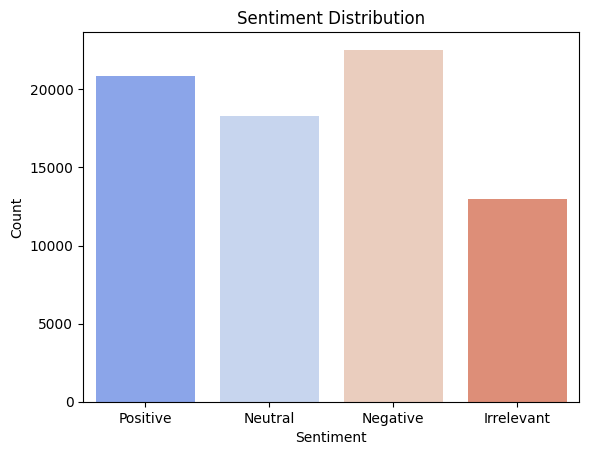

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
#Visulisation 1-Visualize the number of positive vs. negative reviews
sns.countplot(x='Sentiment', data=df, hue='Sentiment', palette='coolwarm', legend=False)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


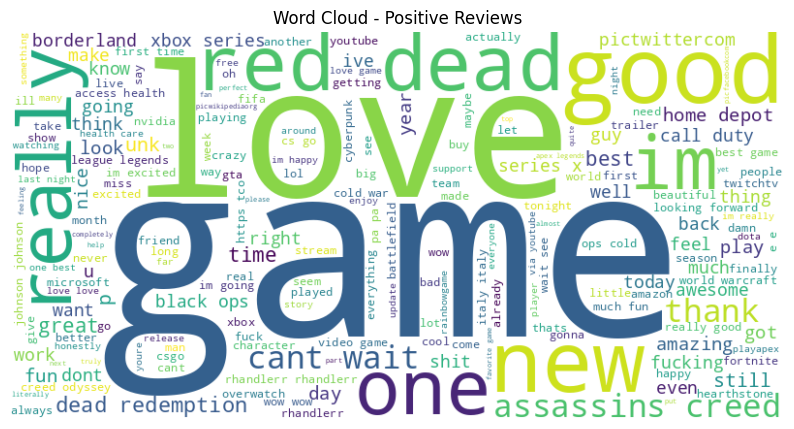

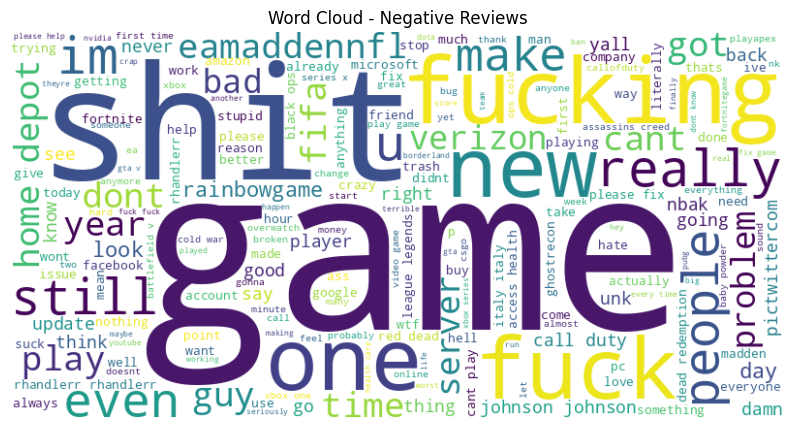

In [39]:
from wordcloud import WordCloud

#Visualisation 2-Word clouds show the most common words in positive and negative reviews.
positive_reviews = ' '.join(df[df['Sentiment'] == 'Positive']['cleaned_text'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud - Positive Reviews')
plt.axis('off')
plt.show()

negative_reviews = ' '.join(df[df['Sentiment'] == 'Negative']['cleaned_text'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud - Negative Reviews')
plt.axis('off')
plt.show()

In [40]:
#3.Model Building: Train a basic machine learning model to classify reviews as Positive or Negative.
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['cleaned_text']).toarray()

# Converting all the sentiment labels to binary (1 for Positive, 0 for Negative)
y = df['Sentiment'].map({'Positive': 1, 'Negative': 0})

# Spilliting the dataset- 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
print("Number of NaNs in y:", y.isna().sum())
nan_indices = y[y.isna()].index


X = np.delete(X, nan_indices, axis=0)
y = y.dropna().reset_index(drop=True)

Number of NaNs in y: 0


In [43]:
print(f"Shape of X after NaN removal: {X.shape}")
print(f"Length of y after NaN removal: {len(y)}")


Shape of X after NaN removal: (43373, 1000)
Length of y after NaN removal: 43373


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training using the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7986167146974064
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.79      0.80      4517
         1.0       0.78      0.80      0.79      4158

    accuracy                           0.80      8675
   macro avg       0.80      0.80      0.80      8675
weighted avg       0.80      0.80      0.80      8675

